USING JUPYTER NOTEBOOK FOR TENSORFLOW


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape
X_train[0].shape

(28, 28)

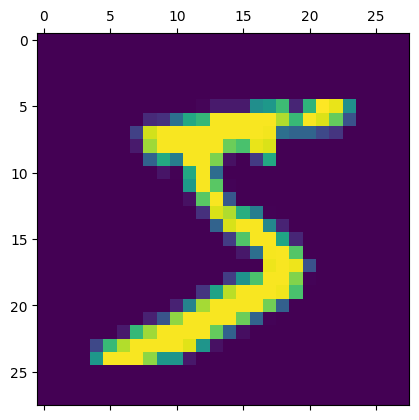

In [6]:
plt.matshow(X_train[0])

Now, we have to flatten the 28 by 28 2 dimensional array into a single array, containing 28*28 elements, thus forming a linear input layer (neuron)

In [7]:
X_train_flattened = X_train.reshape(len(X_train),784) #no of datasets is still equal to length of training set while each data set will now constitute an array of 784 elements

In [8]:
X_test_flattened = X_test.reshape(len(X_test),784)

NOW WE NEED TO SETUP THE INPUT AND OUTPUT NEURAL NETWORKS 

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\prana\OneDrive\Desktop\ML\tensor\myenv\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8073 - loss: 0.7196
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.3092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9225 - loss: 0.2776
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9251 - loss: 0.2705


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3035


[0.2689080238342285, 0.9243000149726868]

HOW TO PREDICT A PARTICULAR TEST VALUE?

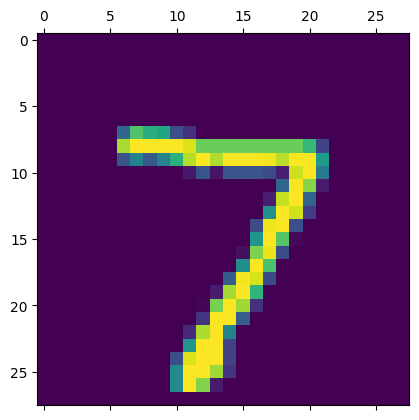

In [11]:
plt.matshow(X_test[0])

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([2.7491227e-02, 3.5904048e-07, 6.5469801e-02, 9.5223272e-01,
       2.4798387e-03, 1.2370053e-01, 2.0630464e-06, 9.9978536e-01,
       9.7447664e-02, 6.7419803e-01], dtype=float32)

WHAT DO WE SEE HERE IS THE OUTPUT VALUES OF SIGMOID FUNCTION FOR EACH NUMBER 1-9. WHATEVER IS THE MAXIMUM, IS OUR PREDICTION 

In [13]:
np.argmax(y_predicted[0])

np.int64(7)

HOW DO I CREATE AN ARRAY OF OUTPUT VALUES - LETS BUILD!

In [14]:
y_predicted_array = [np.argmax(i) for i in y_predicted]
y_predicted_array[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

CONCEPT OF CONFUSION MATRIX

In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_array)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    5,    6,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   5,    9,  924,   15,    7,    7,   13,   10,   37,    5],
       [   4,    0,   19,  897,    0,   46,    3,   13,   21,    7],
       [   1,    1,    3,    2,  906,    0,   13,    5,    9,   42],
       [   9,    2,    3,   15,    7,  805,   15,    4,   25,    7],
       [  11,    3,    7,    1,    7,   15,  911,    2,    1,    0],
       [   1,    5,   24,    5,    6,    1,    0,  954,    2,   30],
       [   6,    7,    7,   18,    9,   46,    9,   11,  855,    6],
       [  11,    6,    1,   10,   24,    9,    0,   25,    6,  917]],
      dtype=int32)>

VISUALIZING CM USING SEABORN

SHOWS HOW MANY TIMES WE HAVE WENT WRONG AND GOT IT RIGHT
DIAGONAL HIGHLIGHTED ELEMENTS ARE THE TIMES WE GOT IT RIGHT 

Text(50.722222222222214, 0.5, 'Truth--->')

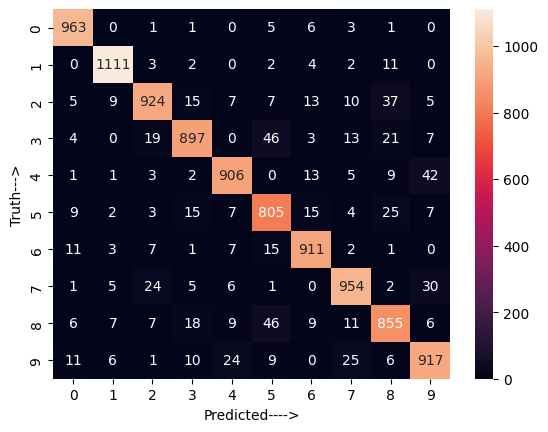

In [16]:
import seaborn as sn
# plt.figure(figsize=(10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted---->')
plt.ylabel('Truth--->')


ADDING A HIDDEN LAYER 

In [17]:
model = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,),activation='relu'), #number of neurons in hidden layer is by trial and error
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\prana\OneDrive\Desktop\ML\tensor\myenv\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8976 - loss: 0.3616
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9724 - loss: 0.0931
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0610
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9873 - loss: 0.0399
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9916 - loss: 0.0277


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0783


[0.06613275408744812, 0.9801999926567078]

METHOD TO SURPASS CREATING FLATTENED ARRAY

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, input_shape=(784,),activation='relu'), #number of neurons in hidden layer is by trial and error
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1) 

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback]) #notice tht we havent used flattened

c:\Users\prana\OneDrive\Desktop\ML\tensor\myenv\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8938 - loss: 0.3651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9736 - loss: 0.0920
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0552
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0426
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0280


TENSORBOARD


In [28]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [29]:
%reload_ext tensorboard

In [30]:
import tensorflow as tf
import datetime

In [31]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 32892), started 8:17:18 ago. (Use '!kill 32892' to kill it.)